In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [31]:
data = pd.read_csv("Mall_Customers.csv")

In [32]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [33]:
data.shape

(200, 5)

### How many customers are there?

In [34]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [35]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the age distribution look like?

In [38]:
data['Age'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
10%       21.000000
20%       26.800000
30%       30.000000
40%       32.000000
50%       36.000000
60%       40.000000
70%       47.000000
80%       50.200000
90%       59.100000
max       70.000000
Name: Age, dtype: float64

This means, the average age is 36 years old.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [39]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

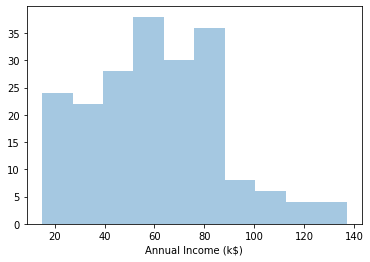

In [40]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [41]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

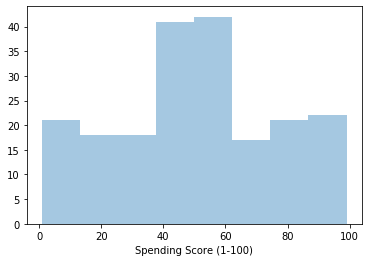

In [42]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed.

# Clustering

In [43]:
# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

In [44]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)','Age']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


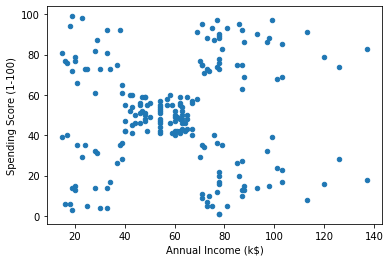

In [45]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

### Perform DBSCAN

In [46]:
# Use DBSCAN and vary eps and min_samples
dbs = DBSCAN(eps=3, min_samples=4)

# Fit data to model
dbs.fit(X)

# Get labels
labels = dbs.labels_

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [23]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),Age,labels
0,15,39,19,-1
1,15,81,21,-1
2,16,6,20,-1
3,16,77,23,-1
4,17,40,31,-1


In [24]:
# How many labels were created
new_data.labels.value_counts()

-1    200
Name: labels, dtype: int64

### Plot Points in Clusters

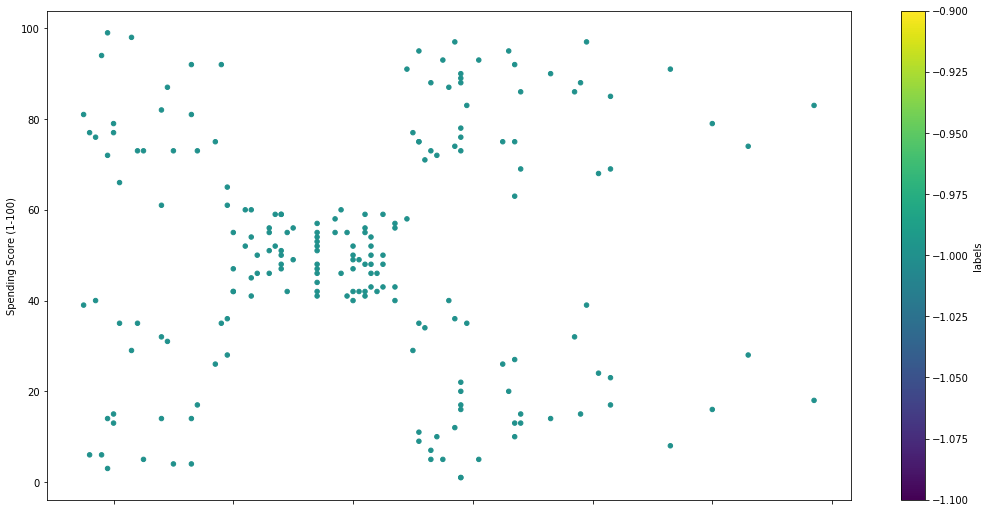

In [47]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(18, 9))



# Deep Dive to each cluster
- Median income is 61, Median spend is 50, Median age is 36

In [48]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==-1]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,200.000000,200.000000,200.000000,200.0
mean,60.560000,50.200000,38.850000,-1.0
std,26.264721,25.823522,13.969007,0.0
min,15.000000,1.000000,18.000000,-1.0
25%,41.500000,34.750000,28.750000,-1.0
50%,61.500000,50.000000,36.000000,-1.0
75%,78.000000,73.000000,49.000000,-1.0
max,137.000000,99.000000,70.000000,-1.0


- Cluster 0: The incredibly average titos and titas

In [49]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==0]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


- Cluster 1: NaN. How come? :(

# Exercises: 
- Add more features to X and see the results of the clusters.
- Add more clusters and see how the clusters look like.

# Explore [GMM](https://colab.research.google.com/drive/1JnPcmzwSxnfPZpAGlZP1pQy5ehbly2iA).